# Penguin Classification - Model Comparison
Comparing different models for penguin species classification. As the first model performed very high, so i wanted to check.

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [8]:
# Load data from database
conn = sqlite3.connect('../../database/penguins.db')
measurements = pd.read_sql_query("""
    SELECT m.*, s.species_name 
    FROM Measurements m 
    JOIN Species s ON m.species_id = s.species_id
""", conn)
conn.close()
print("Dataset shape:", measurements.shape)
print("\nSpecies distribution:")
print(measurements['species_name'].value_counts())

Dataset shape: (333, 7)

Species distribution:
species_name
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64


In [9]:
# Data preparation
X = measurements[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = measurements['species_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Cross-validation
cv_scores = cross_val_score(gb_model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Test set evaluation
y_pred = gb_model.predict(X_test_scaled)
print("\nTest Set Performance:")
print(classification_report(y_test, y_pred))

Cross-validation scores: [0.96296296 0.96226415 0.96226415 0.96226415 0.9245283 ]
Mean CV score: 0.9548567435359889

Test Set Performance:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        31
   Chinstrap       1.00      1.00      1.00        13
      Gentoo       1.00      1.00      1.00        23

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



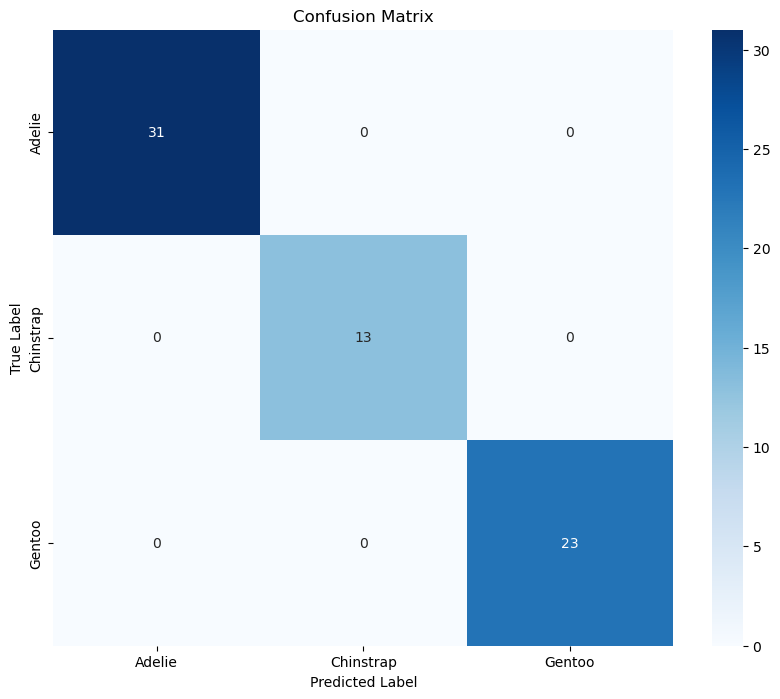

In [11]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=gb_model.classes_,
            yticklabels=gb_model.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

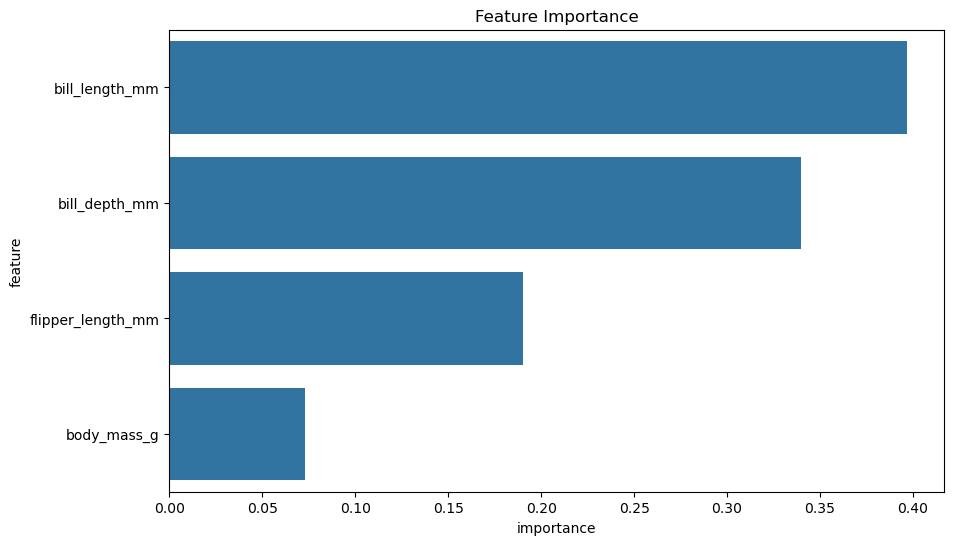

In [12]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()